## 1. Plot the mean climatalogy (temp, precipitation).
## 1a. What is the mean values and corresponding variance from each month.

In [ ]:
# import all the libraries
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# read precipitation csv file
df_rainfall= pd.read_csv('/content/gdrive/MyDrive/data_17.50_80.50.csv')
df_rainfall.head()

,DateTime,17.5 80.5
0,1950-01-01,0.0
1,1950-01-02,0.0
2,1950-01-03,0.0
3,1950-01-04,0.0
4,1950-01-05,0.0


In [ ]:
#renaming the column with actual place name
df_rainfall.rename(columns={'17.5 80.5':'Aswapuram_rainfall'}, inplace= True)
df_rainfall['DateTime']= pd.to_datetime(df_rainfall['DateTime']) #setting up the datetime format
df_rainfall.set_index('DateTime', inplace=True) #making datetime as the index column
df_rainfall.head()

,Aswapuram_rainfall
DateTime,
1950-01-01,0.0
1950-01-02,0.0
1950-01-03,0.0
1950-01-04,0.0
1950-01-05,0.0


In [ ]:
# reading the temperature file
df_temp= pd.read_csv('/content/gdrive/MyDrive/IMD_Temperature_1951_2019.csv')
df_temp.head()

,DateTime,15.5 73.5,16.5 79.5,17.5 80.5,18.5 76.5,18.5 80.5,23.5 80.5,24.5 87.5,25.5 85.5,26.5 86.5
0,01-01-1951,30.24,29.96,28.45,27.91,28.41,21.56,25.02,23.60,24.17
1,02-01-1951,30.54,29.15,27.62,27.08,27.25,20.84,23.44,21.70,22.39
2,03-01-1951,29.67,28.54,26.96,27.12,26.52,21.64,23.61,21.93,22.87
3,04-01-1951,30.31,28.59,27.20,27.55,27.02,22.39,24.22,22.10,22.46
4,05-01-1951,29.85,28.95,27.77,28.56,27.78,23.22,24.81,23.36,23.65


In [ ]:
#extracting the particular co-ordinate as in rainfall i.e 17.5 80.5
#setting Datetime as index
df_temp['DateTime']= pd.to_datetime(df_temp['DateTime']) #setting up the datetime format
df_temp.set_index('DateTime', inplace=True)
column_taken= ['17.5 80.5']
df_temp= df_temp[column_taken]
df_temp.rename(columns={'17.5 80.5':'Aswapuram_temp'}, inplace= True)
df_temp.head()

<ipython-input-6-24271d1e810b>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_temp['DateTime']= pd.to_datetime(df_temp['DateTime']) #setting up the datetime format
<ipython-input-6-24271d1e810b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={'17.5 80.5':'Aswapuram_temp'}, inplace= True)


,Aswapuram_temp
DateTime,
1951-01-01,28.45
1951-02-01,27.62
1951-03-01,26.96
1951-04-01,27.20
1951-05-01,27.77


In [ ]:
df_rainfall.shape #shape of 1st dataframe

(27028, 1)

In [ ]:
df_temp.shape #shape of 2nd dataframe

(25202, 1)

In [ ]:
# Slice df_rainfall to include rows until '31.12.2019'
df_rain = df_rainfall.loc[:'2019-12-31']

# Merge df_temp with df_rain based on the index ('DateTime')
df = df_temp.merge(df_rain, left_index=True, right_index=True)
df.head()


,Aswapuram_temp,Aswapuram_rainfall
DateTime,,
1951-01-01,28.45,0.0
1951-02-01,27.62,0.0
1951-03-01,26.96,0.0
1951-04-01,27.20,0.0
1951-05-01,27.77,0.0


In [ ]:
# Calculate mean climatology for temperature
mean_temperature_climatology = df['Aswapuram_temp'].groupby([df.index.month, df.index.day]).mean()

# Calculate mean climatology for precipitation
mean_rainfall_climatology = df['Aswapuram_rainfall'].groupby([df.index.month, df.index.day]).mean()


climatology= pd.DataFrame({'Months': mean_temperature_climatology.index.get_level_values(1),
    'climatology_Temperature': mean_temperature_climatology.values,'climatology_Rainfall': mean_rainfall_climatology.values,})
climatology

,Months,climatology_Temperature,climatology_Rainfall
0,1,28.825875,0.245225
1,2,30.692138,0.566109
2,3,33.834157,0.063510
3,4,36.834499,0.213136
4,5,38.783838,0.000000
...,...,...,...
361,27,28.785817,0.072525
362,28,28.834048,0.007688
363,29,28.860396,0.000000
364,30,29.017467,0.139980


In [ ]:
# calculating the mean and variance of temperature and rainfall per month
df['Year']=df.index.year #year column
df['Month']=df.index.month #month column
df['Day']=df.index.day #day column
mean_temperature= df.groupby('Month')['Aswapuram_temp'].mean()
var_temperature= df.groupby('Month')['Aswapuram_temp'].var()
mean_rainfall= df.groupby('Month')['Aswapuram_rainfall'].mean()
var_rainfall= df.groupby('Month')['Aswapuram_rainfall'].var()
df_mean= pd.DataFrame({'Months':mean_temperature.index,'Mean_Temperature':mean_temperature.values,'Variance_Temp':var_temperature.values,
                       'Mean_Rainfall':mean_rainfall.values,'Variance_rainfall':var_rainfall.values})
df_mean

,Months,Mean_Temperature,Variance_Temp,Mean_Rainfall,Variance_rainfall
0,1,31.135648,9.046212,0.192074,3.734325
1,2,33.025323,7.641621,0.240353,4.638297
2,3,34.769955,8.834658,0.434238,11.991538
3,4,36.030766,13.684737,0.923867,18.802527
4,5,37.055962,19.925402,1.397195,40.701849
5,6,33.929640,11.225088,5.018498,110.830247
6,7,32.176149,8.793892,9.006478,215.952985
7,8,31.893912,8.185015,8.576474,234.155170
8,9,32.387662,7.469297,5.480855,133.221724
9,10,32.067411,7.841554,3.299801,122.622769


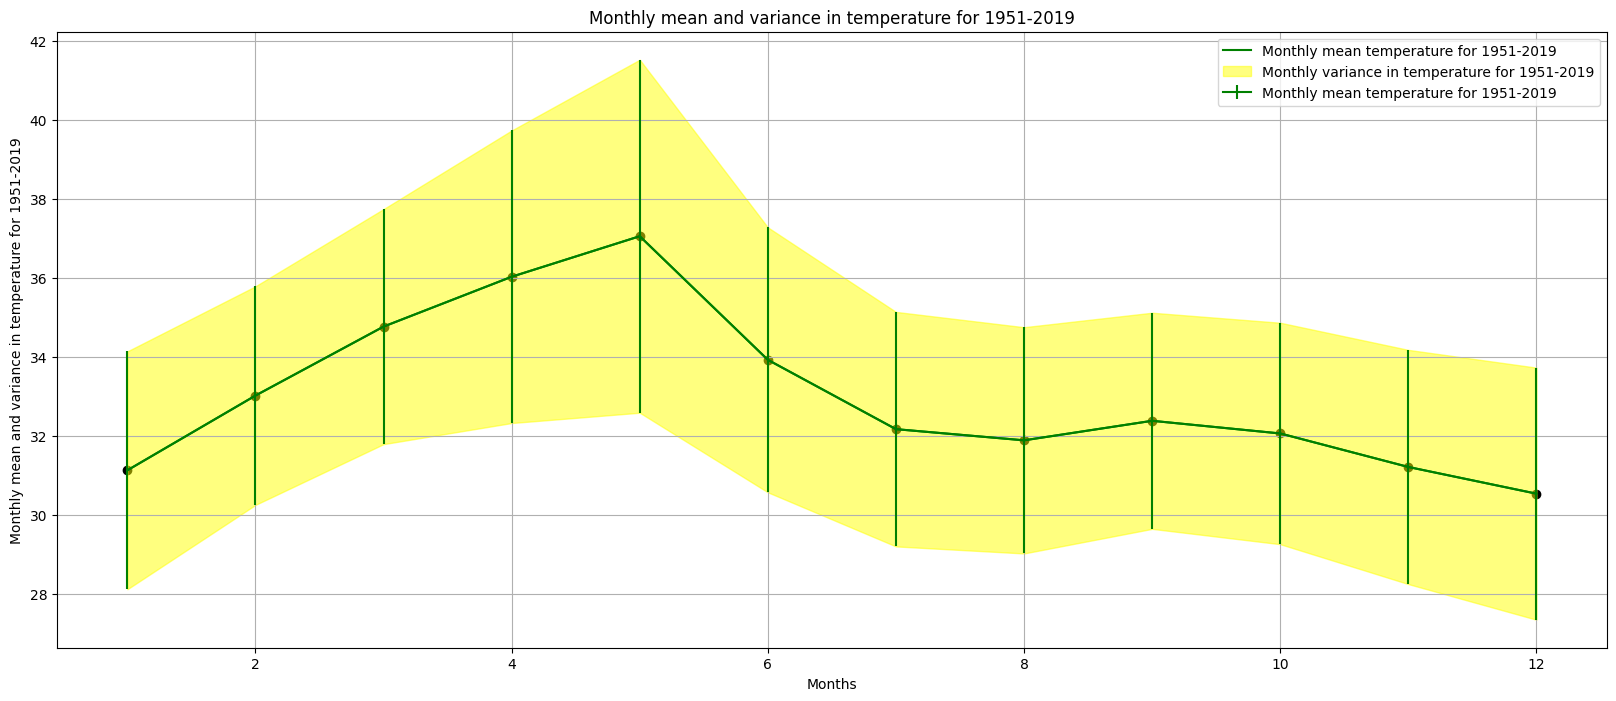

In [ ]:
# plotting the temperature variance range along with mean
df_mean['var_plus_temp']= df_mean['Mean_Temperature']+np.sqrt(df_mean['Variance_Temp']) #to plot the variance range
df_mean['var_minus_temp']= df_mean['Mean_Temperature']-np.sqrt(df_mean['Variance_Temp']) #to plot the variance range

plt.figure(figsize=(20,8))

plt.plot(df_mean['Months'],df_mean['Mean_Temperature'],color='green',label='Monthly mean temperature for 1951-2019')
plt.scatter(df_mean['Months'],df_mean['Mean_Temperature'],color='black')

plt.fill_between(df_mean['Months'],df_mean['var_plus_temp'],df_mean['var_minus_temp'], color='yellow',alpha=0.5, label=
                 'Monthly variance in temperature for 1951-2019')

plt.errorbar(df_mean['Months'],df_mean['Mean_Temperature'],yerr=np.sqrt(df_mean['Variance_Temp']),color='green',label='Monthly mean temperature for 1951-2019')

plt.grid()
plt.legend()
plt.xlabel('Months')
plt.ylabel('Monthly mean and variance in temperature for 1951-2019')
plt.title('Monthly mean and variance in temperature for 1951-2019')
plt.show()

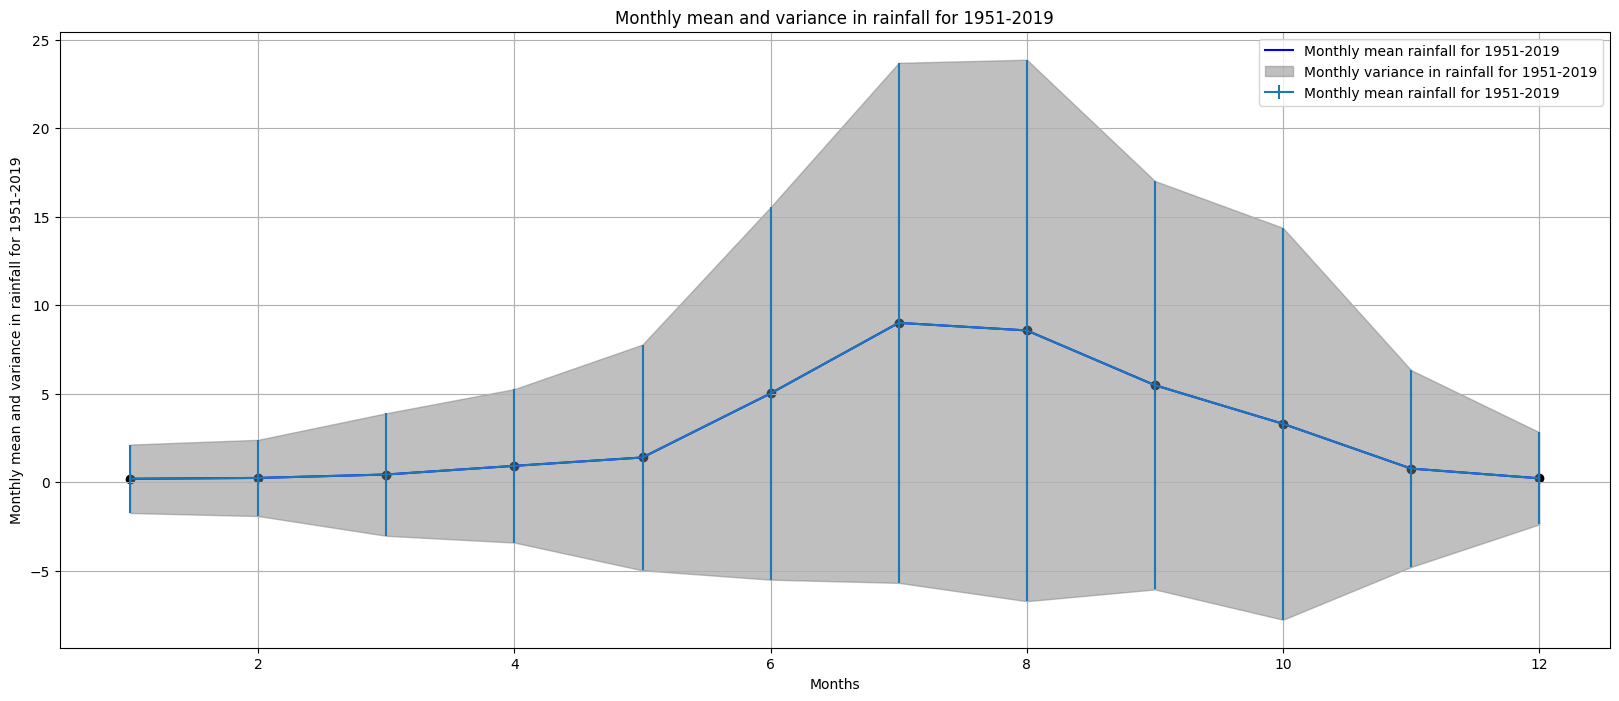

In [ ]:
# plotting the rainfall variance range along with mean
df_mean['var_plus_rain']= df_mean['Mean_Rainfall']+np.sqrt(df_mean['Variance_rainfall']) #to plot the variance range
df_mean['var_minus_rain']= df_mean['Mean_Rainfall']-np.sqrt(df_mean['Variance_rainfall']) #to plot the variance range

plt.figure(figsize=(20,8))

plt.plot(df_mean['Months'],df_mean['Mean_Rainfall'],color='blue',label='Monthly mean rainfall for 1951-2019')
plt.scatter(df_mean['Months'],df_mean['Mean_Rainfall'],color='black')

plt.fill_between(df_mean['Months'],df_mean['var_plus_rain'],df_mean['var_minus_rain'], color='grey',alpha=0.5, label=
                 'Monthly variance in rainfall for 1951-2019')

plt.errorbar(df_mean['Months'],df_mean['Mean_Rainfall'],yerr=np.sqrt(df_mean['Variance_rainfall']),label='Monthly mean rainfall for 1951-2019')

plt.grid()
plt.legend()
plt.xlabel('Months')
plt.ylabel('Monthly mean and variance in rainfall for 1951-2019')
plt.title('Monthly mean and variance in rainfall for 1951-2019')
plt.show()

## 2. Verify if there is any significant change in the climatology between the period from 1950-1980 and 1981-2010.

In [ ]:
# dividing the dataframe in the above slices of years
df_part1=df.loc['1951-01-01':'1980-12-31']
df_part2=df.loc['1981-01-01':'2010-12-31']

# Calculate mean climatology for temperature in part 1
mean_temperature_climatology1 = df_part1['Aswapuram_temp'].groupby([df_part1.index.month, df_part1.index.day]).mean()

# Calculate mean climatology for rainfall in part 1
mean_rainfall_climatology1 = df_part1['Aswapuram_rainfall'].groupby([df_part1.index.month, df_part1.index.day]).mean()


climatology_part1= pd.DataFrame({'Months': mean_temperature_climatology1.index.get_level_values(1),
    'climatology_Temperature': mean_temperature_climatology1.values,'climatology_Rainfall': mean_rainfall_climatology1.values,})

# Calculate mean climatology for temperature in part 2
mean_temperature_climatology2 = df_part2['Aswapuram_temp'].groupby([df_part2.index.month, df_part2.index.day]).mean()

# Calculate mean climatology for rainfall in part 2
mean_rainfall_climatology2 = df_part2['Aswapuram_rainfall'].groupby([df_part2.index.month, df_part2.index.day]).mean()


climatology_part2= pd.DataFrame({'Months': mean_temperature_climatology2.index.get_level_values(0),
    'climatology_Temperature': mean_temperature_climatology2.values,'climatology_Rainfall': mean_rainfall_climatology2.values,})

In [ ]:
climatology_part1.describe()

,Months,climatology_Temperature,climatology_Rainfall
count,366.000000,366.000000,366.000000
mean,15.756831,32.789043,2.785654
std,8.823592,3.341441,3.320966
min,1.000000,28.291000,0.000000
25%,8.000000,30.495583,0.149328
50%,16.000000,31.678333,1.025785
75%,23.000000,35.363667,4.961347
max,31.000000,40.013000,14.133773


In [ ]:
climatology_part2.describe()

,Months,climatology_Temperature,climatology_Rainfall
count,366.000000,366.000000,366.000000
mean,6.513661,33.061640,3.087163
std,3.455958,3.274693,3.837324
min,1.000000,28.446667,0.000000
25%,4.000000,30.694250,0.209594
50%,7.000000,31.803333,1.283822
75%,9.750000,35.203333,5.177731
max,12.000000,40.121667,20.580127


In [ ]:
# perform t-test to check any significant change
from scipy.stats import ttest_ind

# t-test for temperature
t_stat_temperature, p_value_temperature = ttest_ind(mean_temperature_climatology1, mean_temperature_climatology2)

# t-test for rainfall
t_stat_rainfall, p_value_rainfall = ttest_ind(mean_rainfall_climatology1, mean_rainfall_climatology2)

print("Temperature t-test results: t-statistic =", t_stat_temperature, "p-value =", p_value_temperature)
print("Precipitation t-test results: t-statistic =", t_stat_rainfall, "p-value =", p_value_rainfall)

if p_value_rainfall < 0.05 and p_value_rainfall < 0.05:
  print('Significant difference in climatology')
else:
  print('No significant change')

Temperature t-test results: t-statistic = -1.1146817199974572 p-value = 0.26535367745445726
Precipitation t-test results: t-statistic = -1.136630560514322 p-value = 0.25606573428010204
No significant change


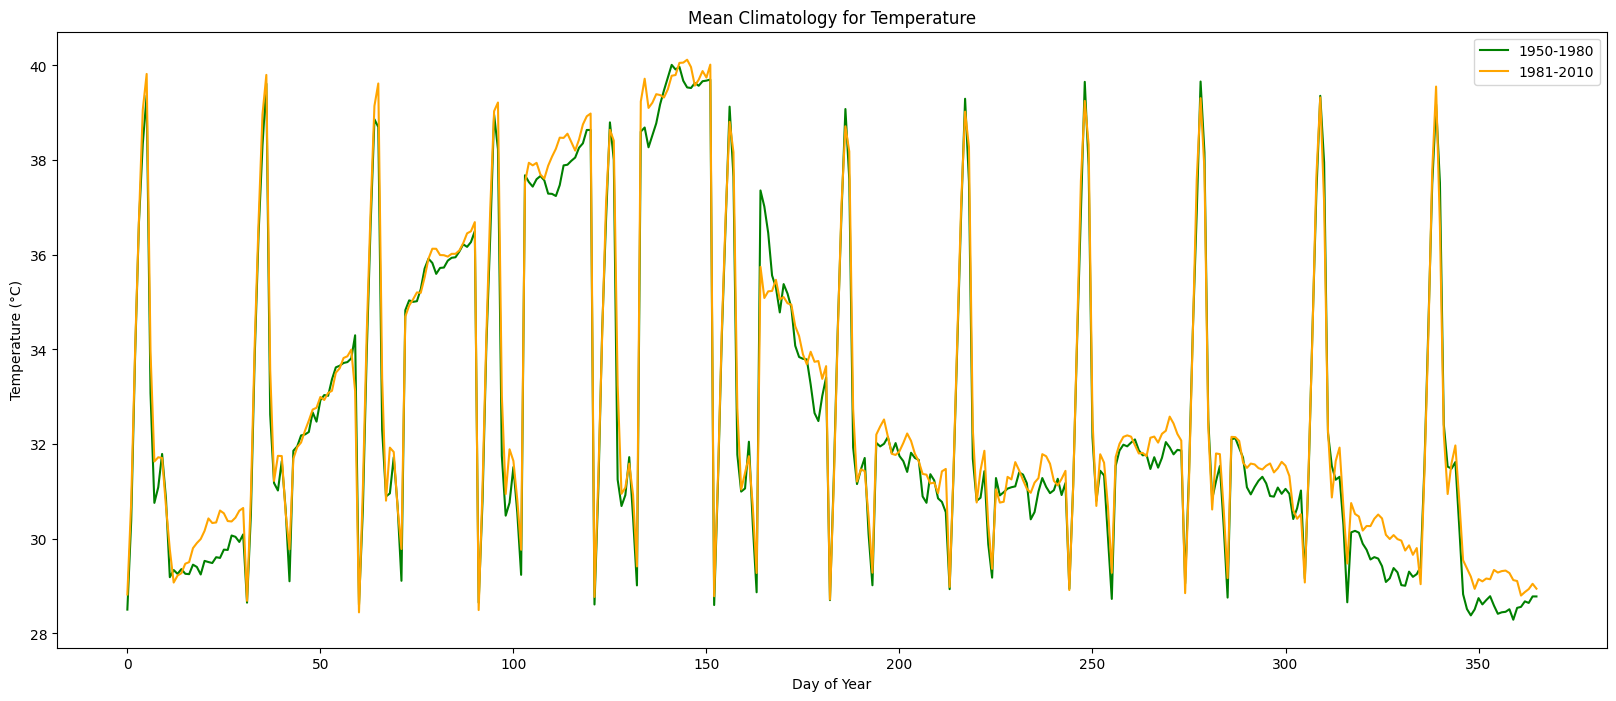

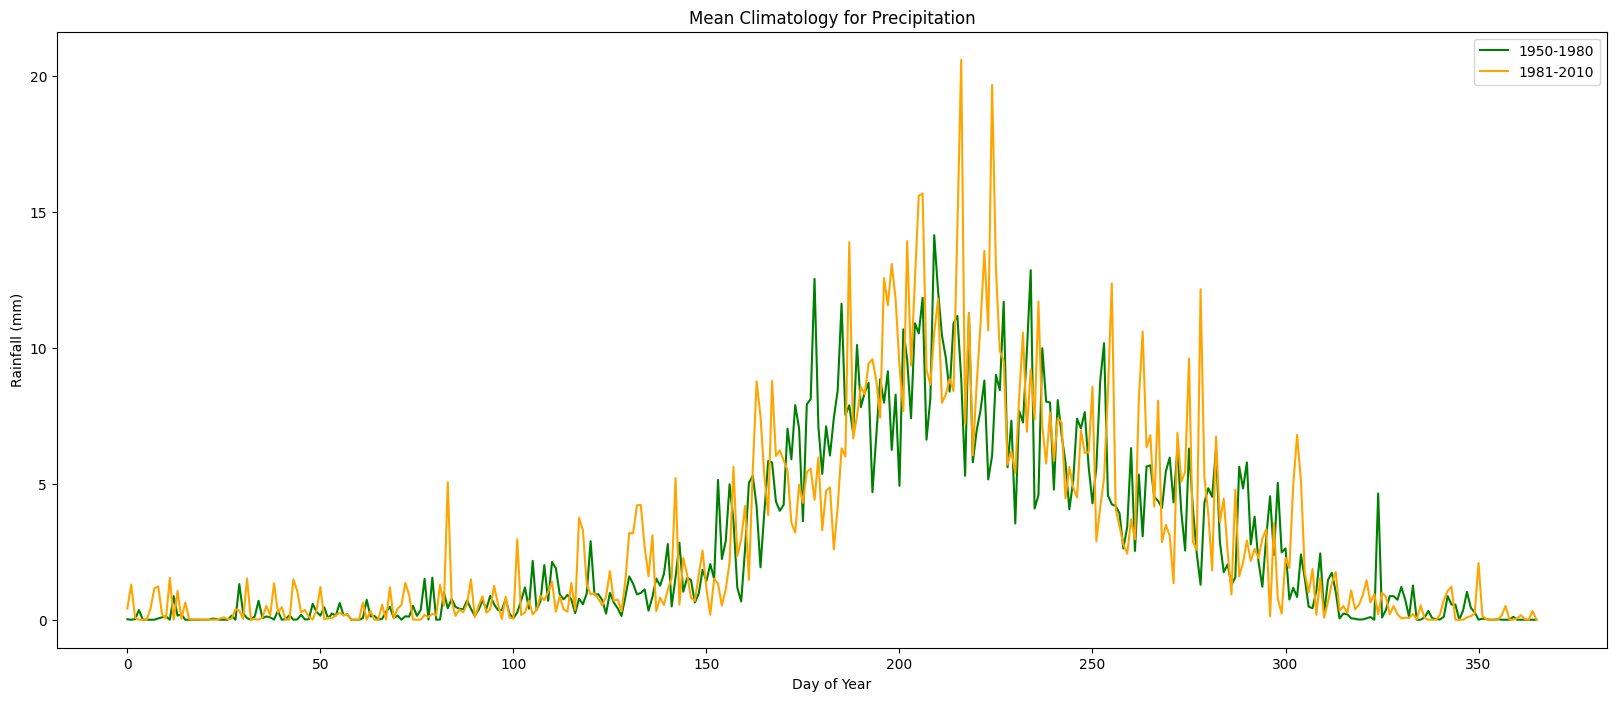

In [ ]:
# visualise the change if any
# Plot mean climatology for temperature
plt.figure(figsize=(20, 8))
plt.plot(mean_temperature_climatology1.values,color='green', label='1950-1980')
plt.plot(mean_temperature_climatology2.values,color='orange',label='1981-2010')
plt.title('Mean Climatology for Temperature')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Plot mean climatology for precipitation
plt.figure(figsize=(20, 8))
plt.plot(mean_rainfall_climatology1.values,color='green', label='1950-1980')
plt.plot(mean_rainfall_climatology2.values,color='orange', label='1981-2010')
plt.title('Mean Climatology for Precipitation')
plt.xlabel('Day of Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

## 3. Extract the maximum rainfall from each year and check for trend in max rainfall using MK Test.

In [ ]:
# maximum rainfall from each year
max_rainfall=df.groupby('Year')['Aswapuram_rainfall'].max()
df_max_rainfall=pd.DataFrame({'Year':max_rainfall.index,'Maximum_rainfall':max_rainfall.values})
df_max_rainfall.head()

,Year,Maximum_rainfall
0,1951,114.7111
1,1952,37.9520
2,1953,56.1003
3,1954,49.7963
4,1955,76.7586


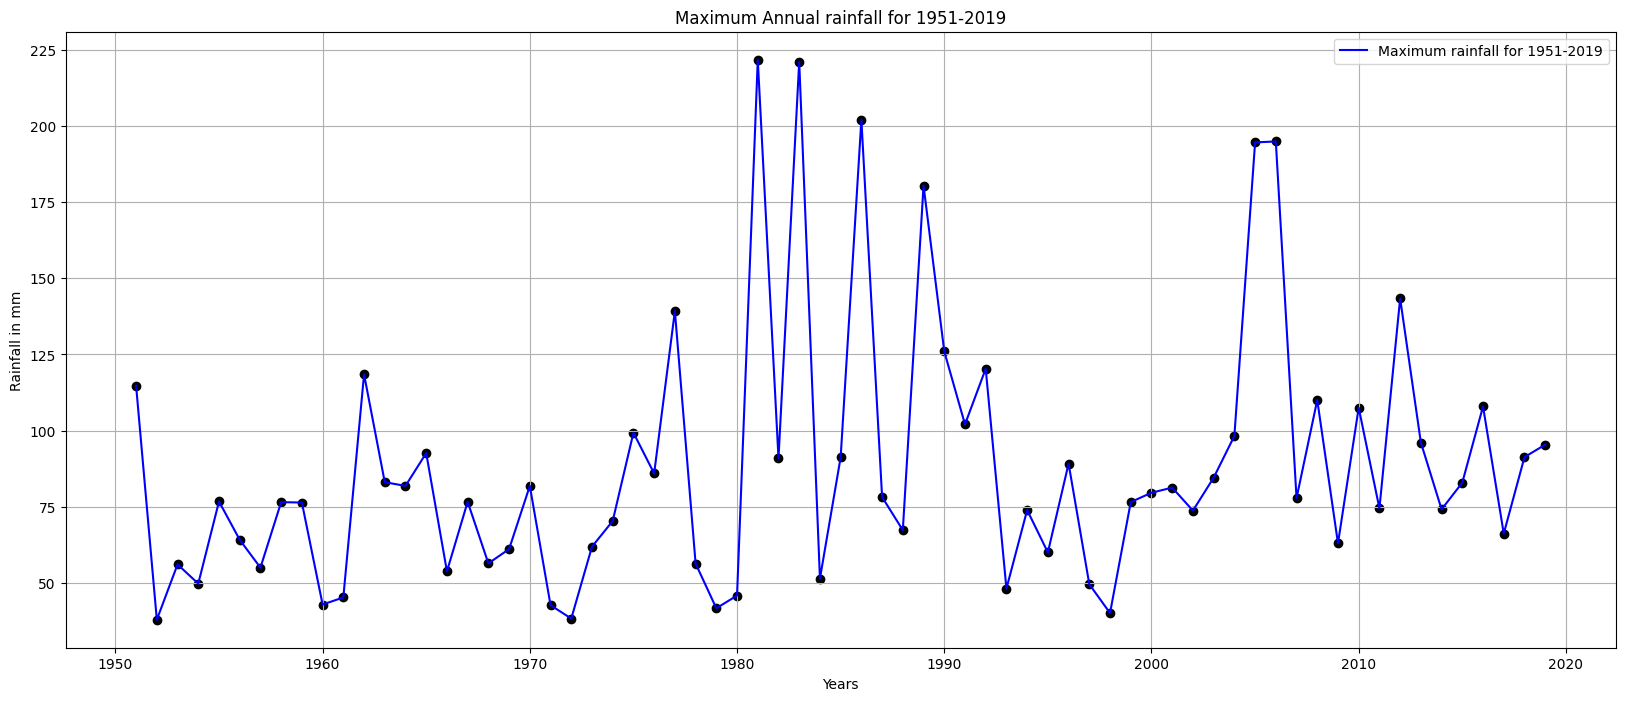

In [ ]:
# plotting the max rainfall data per year

plt.figure(figsize=(20,8))

plt.plot(df_max_rainfall['Year'],df_max_rainfall['Maximum_rainfall'],color='blue',label='Maximum rainfall for 1951-2019')
plt.scatter(df_max_rainfall['Year'],df_max_rainfall['Maximum_rainfall'],color='black')

plt.grid()
plt.legend()
plt.xlabel('Years')
plt.ylabel('Rainfall in mm')
plt.title('Maximum Annual rainfall for 1951-2019')
plt.show()

In [ ]:
# perform mann kendall test for trend analysis
!pip install pymannkendall

In [ ]:
import pymannkendall as mk
max_rainfalltrend=mk.original_test(df_max_rainfall['Maximum_rainfall'])
max_rainfalltrend

Mann_Kendall_Test(trend='increasing', h=True, p=0.008379732303534171, z=2.6363739664313366, Tau=0.21739130434782608, s=510.0, var_s=37275.333333333336, slope=0.4685893530997304, intercept=61.91266199460917)

## 4. Calculate the total rainfall for each year and perform trend analysis.

In [ ]:
# total rainfall from each year
total_rainfall=df.groupby('Year')['Aswapuram_rainfall'].sum()
df_total_rainfall=pd.DataFrame({'Year':total_rainfall.index,'Total_rainfall':total_rainfall.values})
df_total_rainfall.head()

,Year,Total_rainfall
0,1951,1337.7044
1,1952,730.3945
2,1953,1066.0952
3,1954,975.7820
4,1955,1088.3730


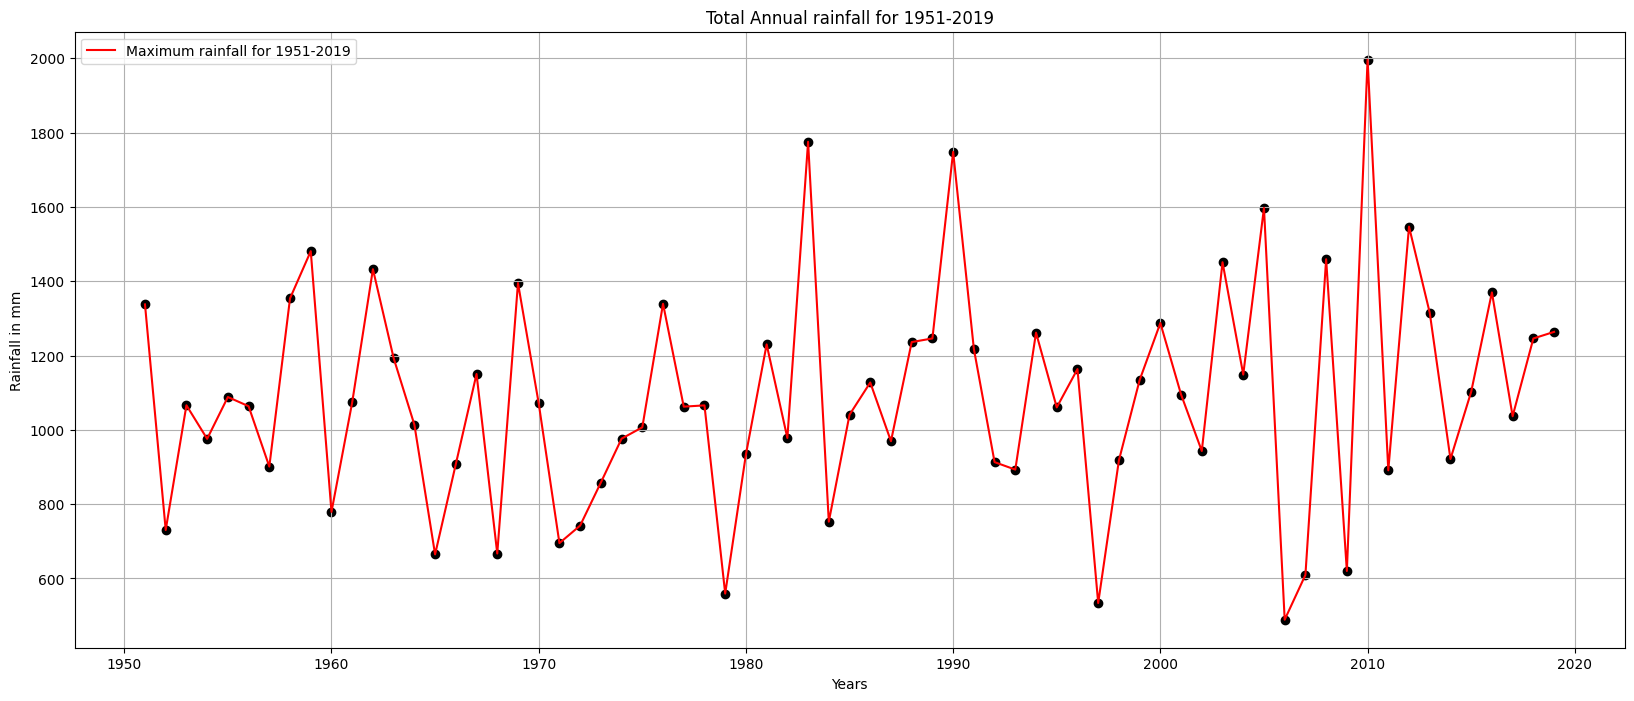

In [ ]:
# plotting the total rainfall data per year

plt.figure(figsize=(20,8))

plt.plot(df_total_rainfall['Year'],df_total_rainfall['Total_rainfall'],color='red',label='Maximum rainfall for 1951-2019')
plt.scatter(df_total_rainfall['Year'],df_total_rainfall['Total_rainfall'],color='black')

plt.grid()
plt.legend()
plt.xlabel('Years')
plt.ylabel('Rainfall in mm')
plt.title('Total Annual rainfall for 1951-2019')
plt.show()

In [ ]:
# perform mann kendall test for trend analysis
total_rainfalltrend=mk.original_test(df_total_rainfall['Total_rainfall'])
total_rainfalltrend

Mann_Kendall_Test(trend='no trend', h=False, p=0.19358085983440487, z=1.3000586749985568, Tau=0.10741687979539642, s=252.0, var_s=37275.333333333336, slope=2.438436230769223, intercept=983.1883681538463)

## 5. Calculate the seasonal rainfall( JJAS, OND, JAM, AM) for each year and perform trend analysis

In [ ]:
# dividing a year into seasons given above
def season(x):
  if x in [6,7,8,9]:
    return 'JJAS'
  elif x in [10,11,12]:
    return 'OND'
  elif x in [1,2,3]:
    return 'JFM'
  elif x in [4,5]:
    return 'AM'
df['Season']=df['Month'].apply(season)
df.head()

,Aswapuram_temp,Aswapuram_rainfall,Year,Month,Day,Season
DateTime,,,,,,
1951-01-01,28.45,0.0,1951,1,1,JFM
1951-02-01,27.62,0.0,1951,2,1,JFM
1951-03-01,26.96,0.0,1951,3,1,JFM
1951-04-01,27.20,0.0,1951,4,1,AM
1951-05-01,27.77,0.0,1951,5,1,AM


In [ ]:
# seasonal rainfall from each year
seasonal_rainfall=df.groupby(['Year','Season'])['Aswapuram_rainfall'].sum()
outside= seasonal_rainfall.index.get_level_values(0)
inside= seasonal_rainfall.index.get_level_values(1)
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
df_season_rainfall=pd.DataFrame({'Year':outside,'Seasons':inside,'Seasonal_rainfall':seasonal_rainfall.values})
df_season_rainfall.head()

,Year,Seasons,Seasonal_rainfall
0,1951,AM,98.1855
1,1951,JFM,16.2321
2,1951,JJAS,1164.4737
3,1951,OND,58.8131
4,1952,AM,40.3254


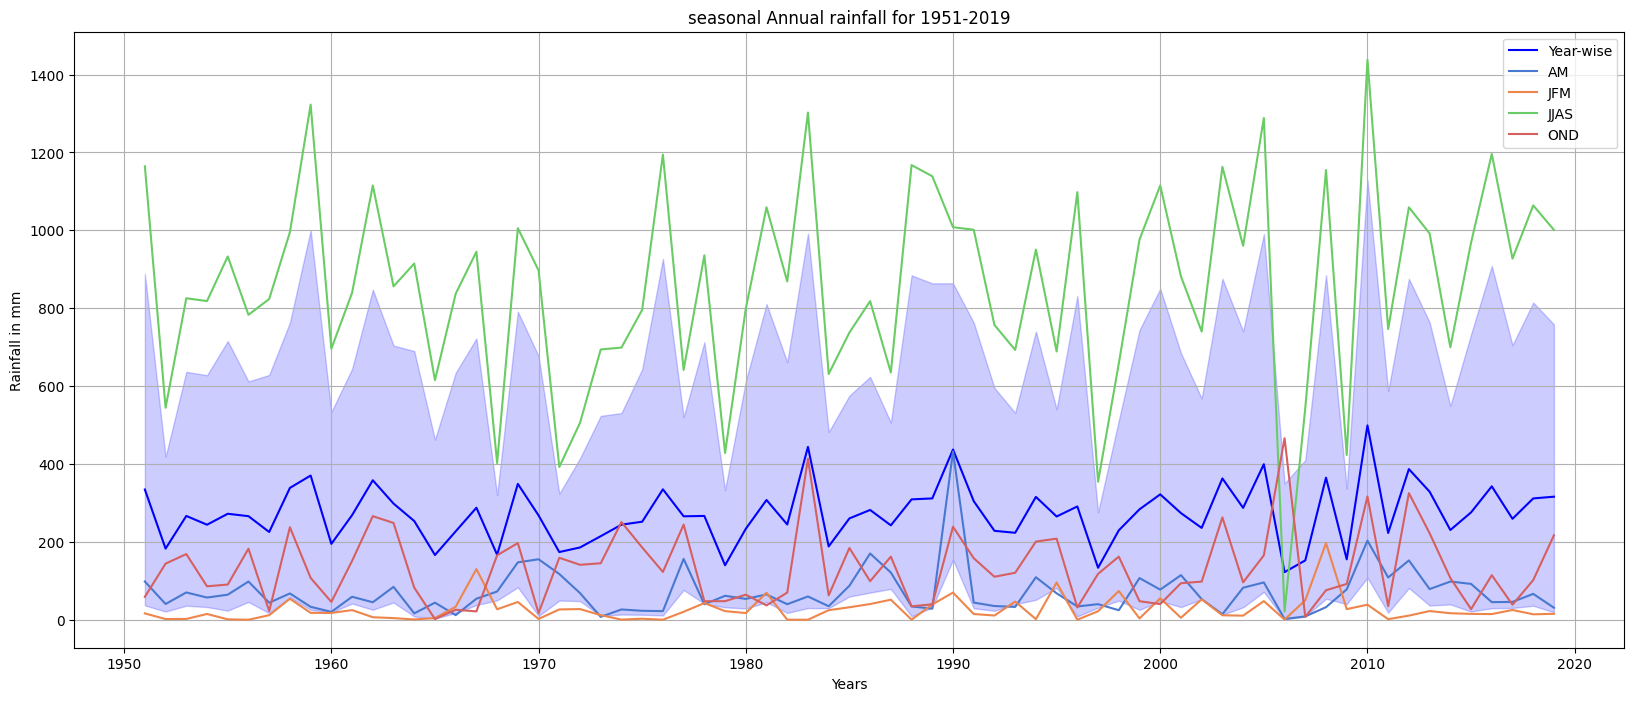

In [ ]:
# plotting the seasonal rainfall data per year

plt.figure(figsize=(20,8))

# Plotting year-wise data
sns.lineplot(data=df_season_rainfall, x='Year', y='Seasonal_rainfall', color='blue', label='Year-wise')

# Plotting season-wise data
sns.lineplot(data=df_season_rainfall, x='Year', y='Seasonal_rainfall', hue='Seasons', palette='muted', legend='full')

plt.grid()
plt.legend()
plt.xlabel('Years')
plt.ylabel('Rainfall in mm')
plt.title('seasonal Annual rainfall for 1951-2019')
plt.show()

In [ ]:
# perform mann kendall test for trend analysis
season_rainfalltrend=mk.original_test(df_season_rainfall['Seasonal_rainfall'])
season_rainfalltrend

Mann_Kendall_Test(trend='no trend', h=False, p=0.4557745868113985, z=0.7458225983990521, Tau=0.030144927536231884, s=1144.0, var_s=2348666.6666666665, slope=0.046933042756330465, intercept=73.99635662100455)

## 6. Plot the Tmax for each year and see the trend over the last 70 years

In [ ]:
# T max for each year
max_temp=df.groupby('Year')['Aswapuram_temp'].max()
df_max_temp= pd.DataFrame({'Year':max_temp.index, 'Maximum_Temperature':max_temp.values})
df_max_temp.head()

,Year,Maximum_Temperature
0,1951,40.78
1,1952,42.04
2,1953,40.16
3,1954,39.70
4,1955,42.25


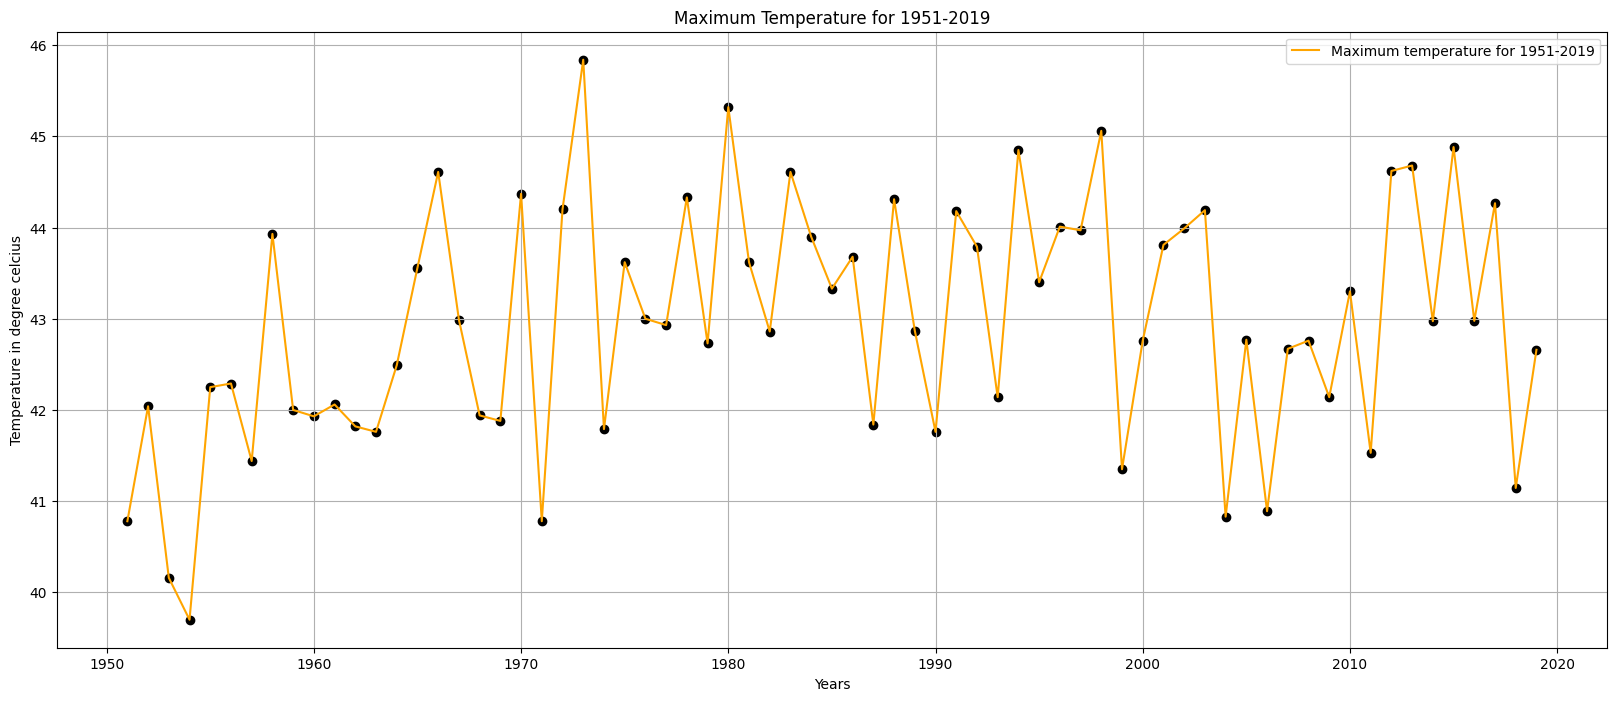

In [ ]:
# plotting the maximum temperature data per year

plt.figure(figsize=(20,8))

plt.plot(df_max_temp['Year'],df_max_temp['Maximum_Temperature'],color='orange',label='Maximum temperature for 1951-2019')
plt.scatter(df_max_temp['Year'],df_max_temp['Maximum_Temperature'],color='black')

plt.grid()
plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature in degree celcius')
plt.title('Maximum Temperature for 1951-2019')
plt.show()

In [ ]:
# perform mann kendall test for trend analysis
max_temptrend=mk.original_test(df_max_temp['Maximum_Temperature'])
max_temptrend

Mann_Kendall_Test(trend='increasing', h=True, p=0.03077017017900574, z=2.160032287251533, Tau=0.17817561807331628, s=418.0, var_s=37269.333333333336, slope=0.01932018518518519, intercept=42.2731137037037)

## 7. Plot the T Min for each and analyse the trend over the 70 years

In [ ]:
# T min for each year
min_temp=df.groupby('Year')['Aswapuram_temp'].min()
df_min_temp= pd.DataFrame({'Year':min_temp.index, 'Minimum_Temperature':min_temp.values})
df_min_temp.head()

,Year,Minimum_Temperature
0,1951,25.66
1,1952,26.63
2,1953,25.77
3,1954,23.33
4,1955,24.80


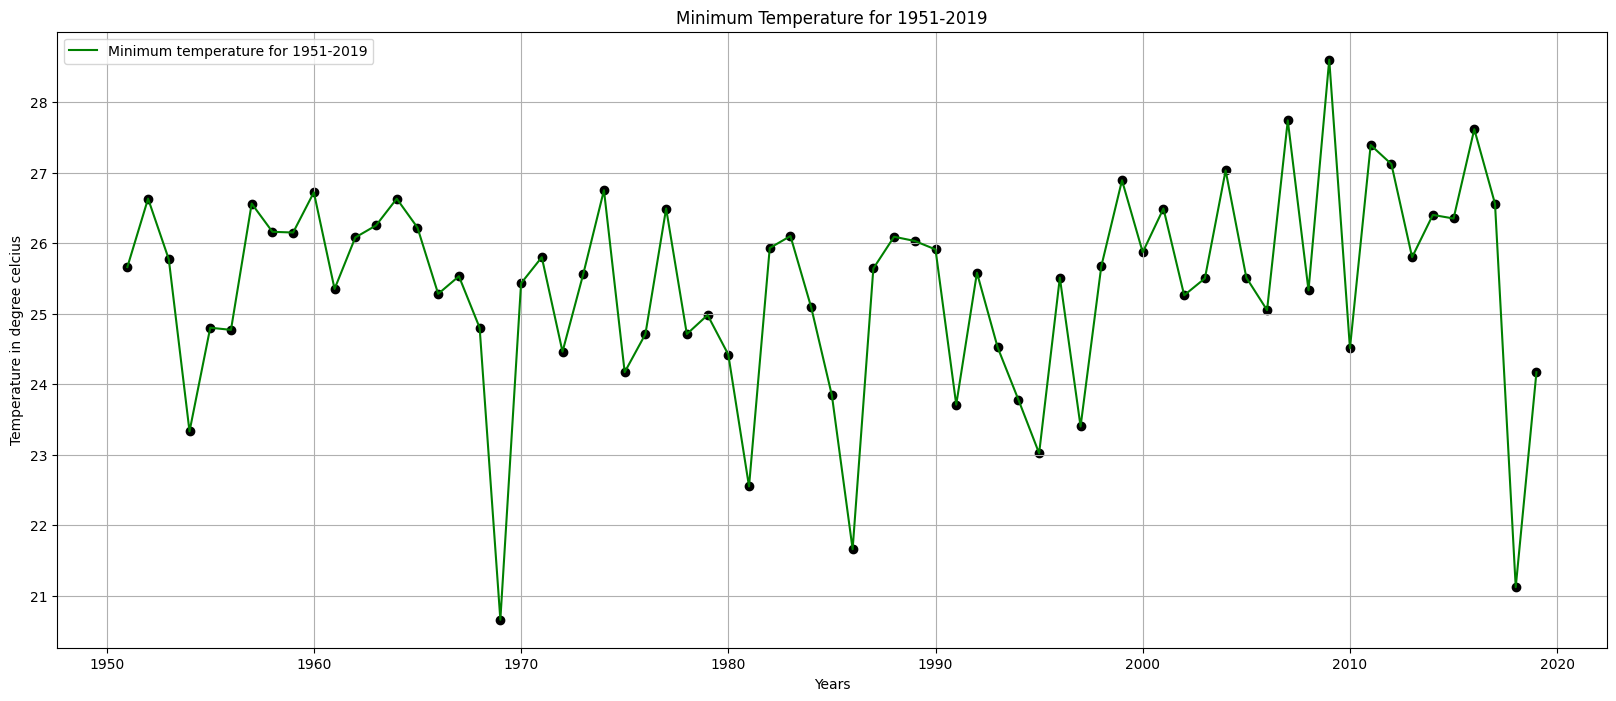

In [ ]:
# plotting the minimum temperature data per year

plt.figure(figsize=(20,8))

plt.plot(df_min_temp['Year'],df_min_temp['Minimum_Temperature'],color='green',label='Minimum temperature for 1951-2019')
plt.scatter(df_min_temp['Year'],df_min_temp['Minimum_Temperature'],color='black')

plt.grid()
plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature in degree celcius')
plt.title('Minimum Temperature for 1951-2019')
plt.show()

In [ ]:
# perform mann kendall test for trend analysis
min_temptrend=mk.original_test(df_min_temp['Minimum_Temperature'])
min_temptrend

Mann_Kendall_Test(trend='no trend', h=False, p=0.6226531152209687, z=0.49209368654411423, Tau=0.04092071611253197, s=96.0, var_s=37269.333333333336, slope=0.005477272727272736, intercept=25.393772727272726)

## 8. Calculate the no of rainy days in a year and check if there any trend in the no. of rainy days. Rainy day
### --day with precipitation greater than 2.5mm



In [ ]:
# function to count the no. of rainy days
def rainydays(x):
    count = 0
    for i in range(len(x)):
        if x[i] > 2.5: # rainy day if rain > 2.5 mm
            count += 1
    return count

count_rainydays = df.groupby('Year')['Aswapuram_rainfall'].apply(rainydays)
number_rainydays = pd.DataFrame({'Year': count_rainydays.index, 'Rainy_days': count_rainydays.values})
number_rainydays.head()

,Year,Rainy_days
0,1951,69
1,1952,69
2,1953,82
3,1954,84
4,1955,90


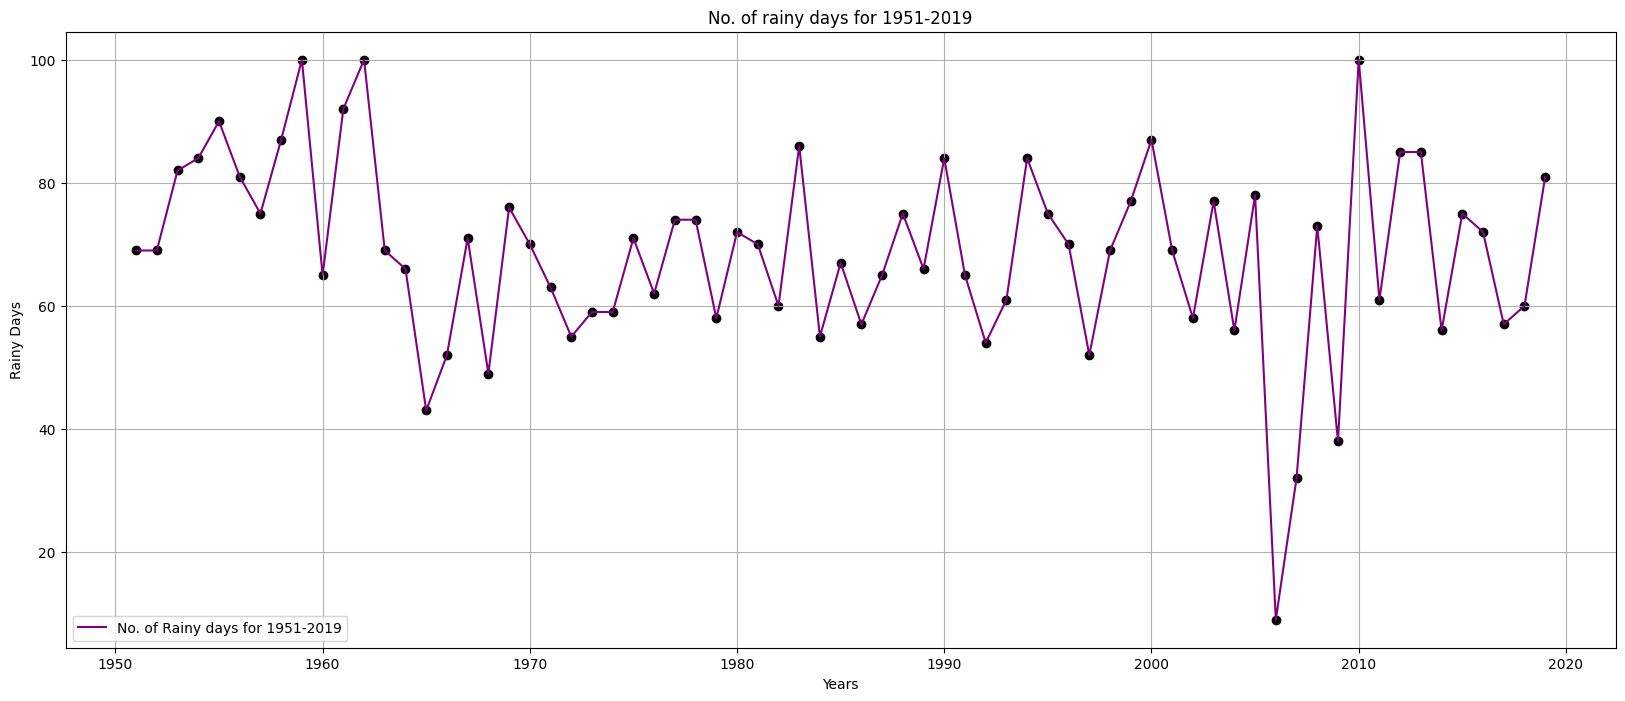

In [ ]:
# plotting the no. of rainy days data per year

plt.figure(figsize=(20,8))

plt.plot(number_rainydays['Year'],number_rainydays['Rainy_days'],color='purple',label='No. of Rainy days for 1951-2019')
plt.scatter(number_rainydays['Year'],number_rainydays['Rainy_days'],color='black')

plt.grid()
plt.legend()
plt.xlabel('Years')
plt.ylabel('Rainy Days')
plt.title('No. of rainy days for 1951-2019')
plt.show()

In [ ]:
# perform mann kendall test for trend analysis
rainy_daystrend=mk.original_test(number_rainydays['Rainy_days'])
rainy_daystrend

Mann_Kendall_Test(trend='no trend', h=False, p=0.2563052849510197, z=-1.135167163331721, Tau=-0.0937766410912191, s=-220.0, var_s=37219.333333333336, slope=-0.11483516483516484, intercept=72.9043956043956)

## Assignment 2-8.Plot the CWT of the monthly rainfall data for the grid that is near to your home town. Analyse and comment on the results

In [ ]:
!pip install pywavelets

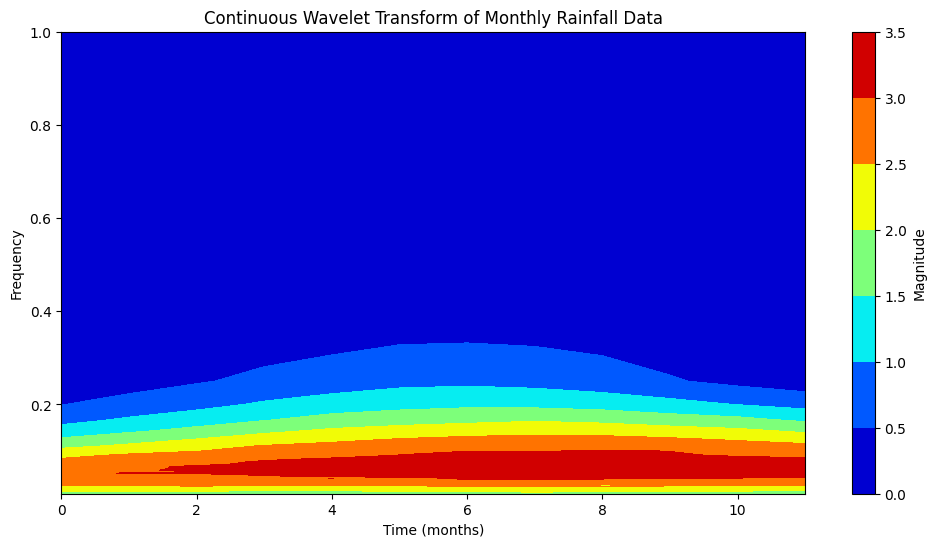

In [ ]:
import pywt
from scipy import signal

data = df_mean['Mean_Rainfall'].values

#  Continuous Wavelet Transform (CWT)
# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet with bandwidth of 1.5 and center frequency of 1.0
scales = np.arange(1, 121)  # Scales for wavelet analysis

# Perform CWT
coefficients, frequencies = pywt.cwt(data, scales, wavelet)

# Plot CWT
plt.figure(figsize=(12, 6))
plt.contourf(np.arange(len(data)), frequencies, np.abs(coefficients), cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform of Monthly Rainfall Data')
plt.xlabel('Time (months)')
plt.ylabel('Frequency')
plt.show()


## 9.Plot the CWT of the extreme rainfall (max daily rainfall) from each year and compare the results with the previous questions’ results

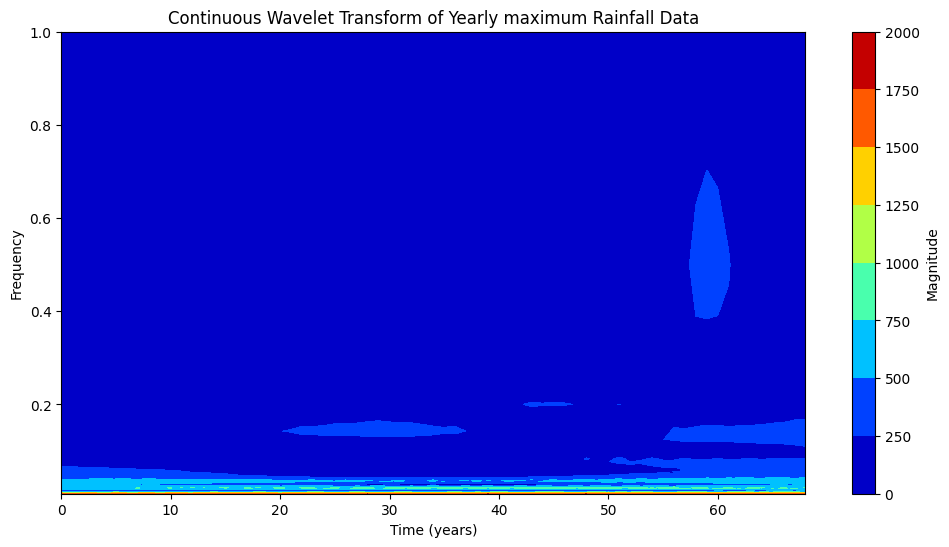

In [ ]:
data_max = df_total_rainfall['Total_rainfall'].values

# Continuous Wavelet Transform (CWT)
# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet with bandwidth of 1.5 and center frequency of 1.0
scales = np.arange(1, 121)  # Scales for wavelet analysis

# Perform CWT
coefficients, frequencies = pywt.cwt(data_max, scales, wavelet)

# Plot CWT
plt.figure(figsize=(12, 6))
plt.contourf(np.arange(len(data_max)), frequencies, np.abs(coefficients), cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform of Yearly maximum Rainfall Data')
plt.xlabel('Time (years)')
plt.ylabel('Frequency')
plt.show()



*  No dominant frequencies in yearly maximum plot
*  More diverse frequency distribution for monthly rainfall data



##10. Take Nino 3.4 index from internet and perform WT analysis and analyse the results.

In [ ]:
import pandas_datareader.data as web

# Define start and end dates for data retrieval
start_date = datetime.datetime(1980, 1, 1)
end_date = datetime.datetime.now()

# Retrieve Nino 3.4 index data from NOAA
nino34_data = web.DataReader('NINO34', 'fred', start_date, end_date)

# Plot the Nino 3.4 index data
plt.figure(figsize=(12, 6))
plt.plot(nino34_data.index, nino34_data['NINO34'], color='blue')
plt.title('Nino 3.4 Index Data')
plt.xlabel('Year')
plt.ylabel('Nino 3.4 Index')
plt.grid(True)
plt.show()

RemoteDataError: Unable to read URL: https://fred.stlouisfed.org/graph/fredgraph.csv?id=NINO34
Response Text:
b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1">\r\n    <title>Error - St. Louis Fed</title>\r\n    <meta name="description" content="">\r\n    <meta name="keywords" content="">    \r\n    <link rel="stylesheet" type="text/css" href="/assets/bootstrap/dist/css/bootstrap.min.css">\r\n    <link rel="stylesheet" type="text/css" href="/css/home.min.css?1553087253">\r\n    <link rel="stylesheet" type="text/css" href="/assets/fontawesome-free/css/all.min.css">\r\n    <link rel="stylesheet" type="text/css" href="/assets/select2/dist/css/select2.min.css">\r\n    <style>p {\r\n        margin-bottom: 1.5em;\r\n    }</style>\r\n</head>\r\n<body>\r\n<link rel="preconnect" href="https://fonts.gstatic.com">\n<link href="https://fonts.googleapis.com/css2?family=Roboto&display=swap" rel="stylesheet">\n<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab&display=swap" rel="stylesheet">\n<!--googleoff: snippet-->\n<a href="#content-container" class="skip-to">Skip to main content</a>\n<!--googleon: snippet-->\n<a name="top" id="top"></a>\n<div id="container" class="container">\n    <header style="display:block;height:auto;background:inherit;">\n        <h1 class="visually-hidden">Federal Reserve Economic Data: Your trusted data source since 1991</h1>\n        <nav class="navbar navbar-expand-lg header-not-home py-0 EL-nonhomepage-header EL-header-and-subheader">\n            <div id="hidden-user" class=\'hide\'></div>\n            <div id="action-modal"></div>\n            <div class="container-fluid align-items-stretch gx-0">\n                <div class="col-3" style="padding-left: 15px; padding-right: 15px;">\n                    <a class="research-logo-gtm" target="_" href="//research.stlouisfed.org/">\n                        <img class="header-logo-eagle d-none d-lg-block" src="//fred.stlouisfed.org/images/masthead-no-bank.png" alt="Eagle Economic Research Logo">\n                        <img class="header-logo-eagle d-lg-none" src="//fred.stlouisfed.org/images/logo-eagle.png" alt="Eagle Logo">\n                    </a>\n                </div>\n                <div class="fred-logo-div col-6 d-lg-none">\n                    <a class="fred-logo-gtm" href="//fred.stlouisfed.org/">\n                        <picture>\n                            <img class="header-logo" src="//fred.stlouisfed.org/images/fred-masthead-mobile-2x.png" alt="mini fred logo">\n                        </picture>\n                    </a>\n                </div>\n                <div class="col-lg-8 col-3 d-flex justify-content-end" style="padding-left: 15px; padding-right: 0px;">\n                    <nav id="blueheader-navbar-nav" style="height:100%s">\n                        <ul id="blueheader-navbar" class="nav float-end">\n                            <li class="blueheader-navbar-item center-content-vertically d-none d-lg-block">\n                                <span id="research-resources-popover-container" class="research-resources-dropdown-gtm header-popover research-resources-popover-container">\n    <span id="research-resources-link" data-toggle="popover" class="align-icon" tabindex="0" style="cursor: pointer">Economic Research Resources\n        <i class="fas fa-angle-down fa-lg header-icon-padding" alt="Open Research Resources Menu Icon"></i>\n    </span>\n</span>\n\n<div class="hide">\n    <div id="research-resources-popover">\n        <div class="container research-resources" style="padding: 7px 25px 0px 25px;">\n            <div class="row">\n                <div class="col-7 research-resources-left-column">\n                    <div class="research-resources-text">Explore resources provided by the Research Division at the Federal Reserve Bank of St. Louis</div>\n                    <div>\n                        <a rel="noopener" target="_blank" class="errd-research-link-gtm" href="https://research.stlouisfed.org" style="color: #364E71; font-family: Roboto; font-weight: 700px">research.stlouisfed.org <i class="fas fa-external-link-alt" aria-hidden="true" style="font-size: 12px"></i></a>\n                    </div>\n                </div>\n                <div class="col-5 research-resources-right-column">\n                    <ul class="header-list-popover list-group flush-list">\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-research-news-gtm" href="https://research.stlouisfed.org/publications/research-news/">Research News</a>\n                        </li>\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-economists-gtm" href="https://research.stlouisfed.org/econ/">Economists</a>\n                        </li>\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-publications-gtm"  href="https://research.stlouisfed.org/publications/">Publications</a>\n                        </li>\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-working-papers-gtm" href="https://research.stlouisfed.org/wp/">Working Papers</a>\n                        </li>\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-info-services-gtm" href="https://research.stlouisfed.org/info-services.html">Information Services</a>\n                        </li>\n                    </ul>\n                </div>\n            </div>\n        </div>\n    </div>\n</div>                            </li>\n                            <li class="blueheader-navbar-item center-content-vertically d-none d-lg-block">\n                                <span id="switchprod-popover-container" class="Switch-Products-gtm header-popover switchprod-popover-container">\n  <span id="switchProd" data-toggle="popover" data-toggle="popover" class="align-icon" tabindex="0" style="cursor: pointer"> Switch Products\n    <i class="fas fa-angle-down fa-lg header-icon-padding" alt="Open Switch Products Menu Icon"></i>\n  </span>\n</span>\n\n<div class="hide">\n  <div id="switchprod-popover">\n    <ul id="switch-prod-list" class="list-group switch-products-list" role="menu" aria-labelledby="switchProduct">\n    <li id="ham-fred-dev" class="list-group-item product-fred">\n        <a class="d-flex burger-fred-gtm" role="menuitem" href="//fred.stlouisfed.org">\n            <span class="w-100 fred-ultra-selected fred-ultra burger-fred-gtm">FRED</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-fred-gtm"><img src="//fred.stlouisfed.org/images/favicon.ico" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-alfred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-alfred-gtm" role="menuitem" href="//alfred.stlouisfed.org">\n            <span class="fred-thin burger-alfred-gtm">AL</span>\n            <span class="w-100 fred-ultra burger-alfred-gtm">FRED</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-alfred-gtm"><div style="width: 16px; height: 16px; background-color: #364e71; border-radius: 2px;"></div></span>\n        </a>\n      </li>\n      <li id="ham-fraser" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-fraser-gtm" role="menuitem" href="https://fraser.stlouisfed.org/">\n            <span class="w-100 fred-ultra burger-fraser-gtm">FRASER</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-fraser-gtm"><div style="width: 16px; height: 16px; background-color: #364e71; border-radius: 2px;"></div></span>\n        </a>\n      </li>\n      <li id="ham-ecolowdown" class="hover-nav-econ hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-econlowdown-gtm" role="menuitem" href="https://www.econlowdown.org/">\n            <span class="w-100 fred-ultra-econ burger-econlowdown-gtm">ECON<br>LOWDOWN</span>\n              <span class="flex-shrink-1 float-end burger-econlowdown-gtm" style="padding-top: 15px"><div style="width: 16px; height: 16px; background-color: #364e71; border-radius: 2px;"></div></span>\n        </a>\n    </li>\n</ul>\n  </div>\n</div>                            </li>\n                            <li class="blueheader-navbar-item center-content-vertically d-none d-lg-block">\n                                <div class="hidden-xs" id="signin-wrap">\n                                    <div id="user-nav" class="EL-my-account-link"></div>\n                                </div>\n                            </li>\n                            <li class="blueheader-navbar-item center-content-vertically d-lg-none">\n                                <a class="hamburger-popover-container header-popover hamburger-gtm" href="#">\n    <i id="hamburger" data-toggle="popover" class="fas fa-bars hamburger-header" alt="Open Mobile Hamburger Menu"></i>\n</a>\n\n<div class="hide">\n    <div id="hamburger-popover">\n        <div class="hamburger-search-padding">\n            <div class=\'input-group\'>\n                <input type="text" class="form-control search-input nav-search" placeholder="Search FRED data...">\n                <button class="btn search-submit nav-search-button" type="submit">\n                    <i class="fa fa-search" alt="Submit Mobile Hamburger Search"></i>\n                </button>\n            </div>\n        </div>\n        <div id="hamburger-navigation">\n            <div id="hamburger-home">\n                <ul class="list-group flush-list hamburger-list col-12" style="padding-bottom: 20px;">\n                    <li class="list-group-item">\n                        <a class="burger-calendar-gtm" href="https://fred.stlouisfed.org/releases/calendar">Release Calendar</a>\n                    </li>\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-tools\')">\n                        <a class="burger-tools-gtm" href="#">FRED Tools\n                            <i class="fas fa-angle-right hamburger-nxt-page-icon" alt="FRED Tools Hamburger Submenu Icon"></i>\n                        </a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-blog-gtm" href="https://fredblog.stlouisfed.org">FRED Blog</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-news-gtm" href="https://news.research.stlouisfed.org/category/fred-announcements/">FRED News</a>\n                    </li>\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-about-fred\')">\n                        <a class="burger-about-gtm" href="#">About FRED\n                            <i class="fas fa-angle-right hamburger-nxt-page-icon" alt="About FRED Hamburger Submenu Icon"></i>\n                        </a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-myaccount-gtm" href="https://fredaccount.stlouisfed.org">My Account</a>\n                    </li>\n                </ul>\n                <ul class="list-group flush-list hamburger-list col-12" style="padding-bottom: 0px;">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-products\')">\n                        <a class="burger-switch-gtm" href="#">\n                            Switch Products<i class="fas fa-angle-right hamburger-nxt-page-icon" alt="Switch Products Hamburger Submenu Icon"></i>\n                        </a>\n                    </li>\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-research\')">\n                        <a class="burger-resources-gtm" href="#">\n                            Economic Research Resources<i class="fas fa-angle-right hamburger-nxt-page-icon" alt="Economic Research Resources Hamburger Submenu Icon"></i>\n                        </a>\n                        <p>Explore resources provided by the Research Division at the Federal Reserve Bank of St. Louis.</p>\n                    </li>\n                </ui>\n            </div>\n            \n            <div id="hamburger-about-fred" class="hide">\n                <ul class="list-group hamburger-submenu-list col-12">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                        <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                        About FRED\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-fred-about-gtm" href="https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/"> What is FRED</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-tutorials-gtm" href="https://fredhelp.stlouisfed.org"> Tutorials</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-data-literacy-gtm" href="https://www.stlouisfed.org/education/digital-badges/fred-data-practitioner">\n                        Data Literacy\n                        </a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-contact-us-gtm" href="https://fred.stlouisfed.org/contactus/"> Contact Us</a>\n                    </li>\n                </ul>\n            </div>\n            \n            <div id="hamburger-tools" class="hide">\n                <ul class="list-group hamburger-submenu-list col-12">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                            <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                            FRED Tools\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-fred-excel-add-in-gtm" href="https://fred.stlouisfed.org/fred-addin"> FRED Add-in for Excel</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-fred-api-gtm" href="https://fred.stlouisfed.org/docs/api/fred"> FRED API</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-fred-mobile-apps-gtm" href="https://fred.stlouisfed.org/fred-mobile"> FRED Mobile Apps</a>\n                    </li>\n                </ul>\n            </div>\n            \n            <div id="hamburger-research" class="hide">\n                <ul class="list-group hamburger-submenu-list col-12">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                        <span>\n                            <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                            Economic Research Resources\n                        </span>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-research-news-gtm" href="https://research.stlouisfed.org/publications/research-news"> Research News</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-economists-gtm" href="https://research.stlouisfed.org/econ/"> Economists</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-publications-gtm" href="https://research.stlouisfed.org/publications/"> Publications</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-working-papers-gtm" href="https://research.stlouisfed.org/wp/"> Working Papers</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-info-services-gtm" href="https://research.stlouisfed.org/info-services.html"> Information Services</a>\n                    </li>\n                </ul>\n            </div>\n            \n            <div id="hamburger-products" class="hide">\n                <ul class="list-group hamburger-submenu-list col-12" style="padding-bottom: 0px !important">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                            <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                            Switch Products\n                    </li>\n                </ul>\n                <ul id="switch-prod-list" class="list-group switch-products-list" role="menu" aria-labelledby="switchProduct">\n    <li id="ham-fred-dev" class="list-group-item product-fred">\n        <a class="d-flex burger-fred-gtm" role="menuitem" href="//fred.stlouisfed.org">\n            <span class="w-100 fred-ultra-selected fred-ultra burger-fred-gtm">FRED</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-fred-gtm"><img src="//fred.stlouisfed.org/images/favicon.ico" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-alfred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-alfred-gtm" role="menuitem" href="//alfred.stlouisfed.org">\n            <span class="fred-thin burger-alfred-gtm">AL</span>\n            <span class="w-100 fred-ultra burger-alfred-gtm">FRED</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-alfred-gtm"><div style="width: 16px; height: 16px; background-color: #364e71; border-radius: 2px;"></div></span>\n        </a>\n      </li>\n      <li id="ham-fraser" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-fraser-gtm" role="menuitem" href="https://fraser.stlouisfed.org/">\n            <span class="w-100 fred-ultra burger-fraser-gtm">FRASER</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-fraser-gtm"><div style="width: 16px; height: 16px; background-color: #364e71; border-radius: 2px;"></div></span>\n        </a>\n      </li>\n      <li id="ham-ecolowdown" class="hover-nav-econ hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-econlowdown-gtm" role="menuitem" href="https://www.econlowdown.org/">\n            <span class="w-100 fred-ultra-econ burger-econlowdown-gtm">ECON<br>LOWDOWN</span>\n              <span class="flex-shrink-1 float-end burger-econlowdown-gtm" style="padding-top: 15px"><div style="width: 16px; height: 16px; background-color: #364e71; border-radius: 2px;"></div></span>\n        </a>\n    </li>\n</ul>\n            </div>\n        </div>\n    </div>\n</div>\n                            </li>\n                        </ul>\n                    </nav>\n                </div>\n            </div>\n        <div id="notifications-container"></div>\n    </nav>\n    <div class=\'navbar navbar-expand-lg sub-header EL-header-and-subheader\'>\n        <div class="container-fluid gx-0">\n            <div class="col-lg-3 col-md-3 d-none d-lg-block" style="padding-left: 15px; padding-right: 15px;" >\n                <a class="fred-logo-gtm" href="//fred.stlouisfed.org/">\n                        <img id="fred-logo-subheader" src="//fred.stlouisfed.org/images/fred-logo-2x.png" alt="FRED Economic Data, St. Louis FED">\n                </a>\n            </div>\n            <h1 class="col-lg-2 fred-trust-text d-none d-xl-block d-flex align-self-center" role="presentation" style="padding: 45px 0px 45px; margin-left: -1px; font-weight:400">\n                <p class="mb-0">Your trusted data source</p> <p>since 1991.</p>\n            </h1>\n            <div class="col d-flex justify-content-end" style="padding-left: 15px; padding-right: 15px;">\n                <div class="container-fluid gx-0">\n                    <div class="search-header-div float-end col-8 d-none d-lg-block">\n                        <div class=\'input-group EL-header-search-container\' id="search-container-header">\n                            <select id="head-search" class=\'EL-header-search\' style="\n                                border-radius: 25px 0 0 25px;\n                                background-color: #5e88a2;\n                                border-right: 0;\n                                color: #fff;\n                                font-family: Roboto,sans-serif;\n                                border: none;\n                                height: 45px;\n                            ">\n                                <option></option>\n                            </select>\n                            <input type="hidden" name="st" class="search-text-input">\n                            <button class="btn search-submit-select2" id="select2-nav-search-button" aria-label="search" type="submit">\n                                <i class="fa fa-search"></i>\n                            </button>\n                        </div>\n                    </div>\n                    <nav class="row col-12 navbar EL-main-nav navbar-expand-sm d-none d-lg-flex" id="subheader-nav" role="navigation">\n    <div class="navbar-padding navbar-collapse collapse d-flex justify-content-end">\n        <ul id="subheader-navbar" class="nav float-end navbar-nav">\n            <li class="nav-li-subheader">\n                <a href="https://fred.stlouisfed.org/releases/calendar" class="nav-releasecal-subheader-gtm">Release Calendar</a>\n            </li>\n            <li class="nav-li-subheader">\n              <span class="sub-header-nav-tools-gtm  header-popover fred-tools-container" tabindex="0" aria-labelledby="fred-tools-link">\n  <span id="fred-tools-link" data-toggle="popover" class="align-icon">FRED Tools\n    <i class="fas fa-angle-down header-icon-padding" alt="Open FRED Tools Menu Icon"></i>\n  </span>\n</span>\n\n<div class="hide">\n  <div id="fred-tools-popover">\n    <ul class="header-list-popover list-group flush-list">\n      <li class="list-group-item">\n        <a class="homepage-nav-tools-fred-excel-addin-gtm" href="https://fred.stlouisfed.org/fred-addin">FRED Add-in for Excel</a>\n      </li>\n      <li class="list-group-item">\n        <a class="homepage-nav-tools-fred-api-gtm" href="https://fred.stlouisfed.org/docs/api/fred">FRED API</a>\n      </li>\n      <li class="list-group-item">\n        <a class="homepage-nav-tools-fred-mobile-gtm" href="https://fred.stlouisfed.org/fred-mobile">FRED Mobile Apps</a>\n      </li>\n    </ul>\n  </div>\n</div>            </li>\n            <li class="nav-li-subheader">\n                <a href="https://news.research.stlouisfed.org/category/fred-announcements/" class="nav-news-subheader-gtm">FRED News</a>\n            </li>\n            <li class="nav-li-subheader">\n                <a href="https://fredblog.stlouisfed.org/" class="nav-fredblog-subheader-gtm">FRED Blog</a>\n            </li>\n            <li class="nav-li-subheader">\n              \n<span class="subheader-nav-about-gtm header-popover about-fred-container" tabindex="0" aria-labelledby="about-fred-link">\n  <span id="about-fred-link" data-toggle="popover" class="align-icon">About FRED\n    <i class="fas fa-angle-down header-icon-padding" alt="Open About FRED Menu Icon"></i>\n  </span>\n</span>\n\n<div class="hide">\n  <div id="about-fred-popover">\n      <ul class="header-list-popover list-group flush-list">\n        <li class="list-group-item">\n          <a class="about-fred-what-is-gtm" href="https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/">\n            What is FRED\n          </a>\n        </li>\n        <li class="list-group-item">\n          <a class="about-fred-tutorials-gtm" href="https://fredhelp.stlouisfed.org">\n            Tutorials\n          </a>\n        </li>\n        <li class="list-group-item">\n          <a class="about-research-data-literacy-gtm" href="https://www.stlouisfed.org/education/digital-badges/fred-data-practitioner">\n            Data Literacy\n          </a>\n        </li>\n        <li class="list-group-item">\n          <a class="about-fred-contact-gtm" href="https://fred.stlouisfed.org/contactus/ ">\n            Contact Us\n          </a>\n        </li>\n      </ul>\n  </div>\n</div>\n            </li>\n        </ul>\n    </div>\n</nav>\n                </div>\n            </div>\n        </div>\n    </div>\n    </header>\n  <div class="clear row gx-0" id="content-container">\n\n\r\n<!--BEGIN CONTENT-->\r\n<div class="error-container">\r\n    <h1>Looking for Something?</h1>\r\n    <p class="large">We\'re sorry, the page you were looking for cannot be found. Please feel free\r\n        to <a href="/contactus/">contact us</a> if the problem persists.</p>\r\n    <p class="large">Searching may help find what are you looking for. If all else fails, you can head\r\n        <a href="/">Home</a>\r\n    </p>\r\n    <form action="/searchresults" id="search-form-404">\r\n        <label for="search-text">Search for:</label><br>\r\n        <input type="text" name="st" id="search-text" size="50" class="form-control">\r\n        <input type="submit" class="btn btn-default" value="Search" id="404-search-button" name="404-search-button">\r\n    </form>\r\n</div>\r\n<link href="/css/footer.min.css?1553087256" rel="stylesheet" media="all">\r\n<!--END CONTENT-->\r\n<style>\n    .h2-508 {\n        font-size: 1em !important;\n        margin-top: 2px !important;\n        margin-bottom: 2px !important\n    }\n</style>\n\n<br class="clear">\n</div>\n\n<div class="footer2 hidden-print row EL-footer2" style="padding-top: 20px;">\n    <div class="col-12 col-md-3">\n        <h3>Need Help?</h3>\n        <div>\n            <a class="footer-questions-gtm" href="//fred.stlouisfed.org/contactus/" class="q-and-a-link-gtm">Questions or\n                Comments</a>\n        </div>\n        <div style="padding: 10px 0 20px 0;">\n            <a class="footer-fredhelp-gtm" href="//fredhelp.stlouisfed.org/">FRED Help</a>\n        </div>\n    </div>\n\n    <div class="col-12 col-md-6">\n        <div class="col-12">\n            <h3>Subscribe to the FRED newsletter</h3>\n            <form id="subscribe-div" class="form-horizontal form-control newsletter-form" style="padding:0;margin:0">\n                <div class="col-12" style="padding-left: 0;">\n                    <div class="input-group">\n                        <input id="subscribe-email-input" type="text" name="email" placeholder="Email"\n                            class="form-control email" style="padding: 4px 0px 4px 14px;" aria-label="email">\n                        <button id="subscribe-email-btn" type="button"\n                            class="btn btn-default subscribe-newsletter-btn-gtm"\n                            style="color: #333; border-radius: 4px; border-color: #cccccc; padding: 0 7px 0px 7px; font-size: 14px;">Subscribe</button>\n                    </div>\n                </div>\n            </form>\n        </div>\n    </div>\n    <hr class="d-md-none" style="border: none;">\n    <div class="col-12 col-md-3">\n        <h3 style="width: 100%; text-align: center;">Follow us</h3>\n        <div class="col-12" style="text-align: center;">\n            <a aria-label="Saint Louis Fed twitter page" href="http://bit.ly/9ngC3L"><i\n                    class="fab fa-fw fa-2x fa-twitter"></i></a>\n            <a aria-label="Saint Louis Fed facebook page" href="http://bit.ly/HeaderFB"><i\n                    class="fab fa-fw fa-2x fa-facebook"></i></a>\n            <a aria-label="Saint Louis Fed youtube page" href="http://bit.ly/aY9TVF"><i\n                    class="fab fa-fw fa-2x fa-youtube"></i></a>\n            <a aria-label="Saint Louis Fed linkedin page" href="http://bit.ly/d056zL"><i\n                    class="fab fa-fw fa-2x fa-linkedin"></i></a>\n        </div>\n    </div>\n</div>\n\n<div class="hidden-print d-md-none">\n    <a style="margin: 5px; display: block; padding:5px 10px; text-align: center" href="#top">Back to Top</a>\n</div>\n\n<div id="footer-bottom" class="row EL-footer-bottom">\n    <div id="address" class="col-12 col-md-8 d-none d-sm-block">\n        Federal Reserve Bank of St. Louis,\n        One Federal Reserve Bank Plaza,\n        St. Louis, MO 63102\n    </div>\n    <div id="legal-and-privacy" class="col-12 col-md-4 d-none d-sm-block">\n        <a class="me-4" href="//fred.stlouisfed.org/legal/">Legal</a>\n        <a href="//research.stlouisfed.org/privacy.html">Privacy Notice & Policy</a>\n    </div>\n    <div class="col-12 d-block d-sm-none text-center">\n        <div>Federal Reserve Bank of St. Louis, One Federal Reserve Bank Plaza, St. Louis, MO 63102</div>\n        <div class="mt-3"><a href="//fred.stlouisfed.org/legal/">Legal</a></div>\n        <div class="mt-3"><a href="//research.stlouisfed.org/privacy.html">Privacy Notice & Policy</a></div>\n    </div>\n</div>\n\n<script>\n    // function to parse cookies, and return the value\n    function getCookie(name) {\n        var cookies = document.cookie.split(\';\');\n        for (var i in cookies) {\n            var cookie = cookies[i].trim().split(\'=\');\n            if (cookie[0] == name) {\n                return cookie[1];\n            }\n        }\n        return null;\n    }\n    // certain pages in FRED set a custom tag variable\n    // this gets sent to Google Analytics so we can see what tags people are using\n    if (window.tags) {\n        dataLayer.push({ \'tags\': tags });\n\n    }\n\n    // if the user is logged in, send the value of the liruid cookie to Google Analytics\n    var researchLiruid = getCookie(\'research-liruid\');\n    dataLayer.push({ \'userId\': researchLiruid });\n\n</script>\n<script src="//fred.stlouisfed.org/assets/jquery/dist/1709058721.jquery.min.js" type="text/javascript"></script>\n<script src="//fred.stlouisfed.org/assets/popperjs/dist/umd/1709058722.popper.min.js"></script>\n<script src="//fred.stlouisfed.org/assets/bootstrap/dist/js/1709058723.bootstrap.min.js"></script>\n<script src="//fred.stlouisfed.org/assets/select2/dist/js/1686149278.select2.full.min.js"></script>\n<script>\n    // force expire the .fred.stlouisfed.org _ga cookie\n    document.cookie = document.cookie + \'_ga=;domain=.fred.stlouisfed.org;expires=Sat, 01-Jan-2000 00:00:00 GMT\';\n</script>\n\n<script defer src="//fred.stlouisfed.org/assets/jquery-menu-aim/1710164719.jquery.menu-aim.min.js"></script>\n\n<script src="//fred.stlouisfed.org/js/1710164722.common.min.js"></script>\n\n<script src="//fred.stlouisfed.org/assets/js-cookie/src/js.cookie.js"></script>\n<script src="//fred.stlouisfed.org/js/1710164719.508.min.js"></script>\n\n<script>\n    var appConfig = {\n        uapi_host: \'https://fred.stlouisfed.org/uapi\',\n        research_host: \'https://research.stlouisfed.org\',\n        fred_host: \'https://fred.stlouisfed.org\',\n        alfred_host: \'https://alfred.stlouisfed.org\',\n        gsi_client_id: \'115290014367-vpb89b600koe9kn0njeeq38c1unfr3gk.apps.googleusercontent.com\',\n        fred_account_host: \'https://fredaccount.stlouisfed.org\',\n    };\n\n    var domain_suffix = (window.location.hostname.split(".")[0].split("-")[1] || \'\');\n    appConfig.logged_in = Cookies.get(\'research-lirua\' + (domain_suffix ? \'-\' + domain_suffix : \'\')) !== null && Cookies.get(\'research-lirua\' + (domain_suffix ? \'-\' + domain_suffix : \'\')) !== undefined;\n    var getAuth = function (callback) {\n        if (typeof callback === \'function\') {\n            callback();\n        }\n        return;\n    };\n    window.getAuth = getAuth;\n\n</script>\n<script defer src="//fred.stlouisfed.org/js/1704908203.banner.js"></script>\n<script src="//accounts.google.com/gsi/client" async defer></script>\n<script src="//fred.stlouisfed.org/assets/research/fred-account-react/dist/1701878032.main.dist.js"></script>\n<script src="//fred.stlouisfed.org/assets/research/fred-account-react/dist/1701878032.vendor.dist.js"></script>\n\n<script type="text/javascript">\n    window.addEventListener("DOMContentLoaded", function () {\n        $(document).ready(function () {\n            // handle tabbing into and out of the subscribe text box\n            $(\'#subscribe-email-input\').on(\'focusout\', function () {\n                $(this).css(\'outline-color\', \'white\');\n            });\n\n            $(\'#subscribe-email-input\').on(\'keyup\', function (e) {\n                if (e.key == \'Tab\') { // tab into search input\n                    $(\'#subscribe-email-input\').css({ \'outline-color\': \'#364E71\' });\n                }\n            });\n\n\n        });\n    });\n</script>\r\n</body>\r\n</html>\r\n'